In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("spam.csv",encoding="latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

<ipython-input-146-a292fc3aae38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [ ]:
df.rename(columns={'v1':'Category','v2':'Message'},inplace=True)
df.head()

<ipython-input-147-00565781ec22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'Category','v2':'Message'},inplace=True)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["Category"].replace("ham","NotSpam",inplace=True)
df["Category"].replace("spam","Spam",inplace=True)
df.head()

<ipython-input-148-5f6ae10ee193>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Category"].replace("ham","NotSpam",inplace=True)
<ipython-input-148-5f6ae10ee193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Category"].replace("ham","NotSpam",inplace=True)
<ipython-input-148-5f6ae10ee193>:2: FutureWarning: A value is trying to be 

,Category,Message
0,NotSpam,"Go until jurong point, crazy.. Available only ..."
1,NotSpam,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,NotSpam,U dun say so early hor... U c already then say...
4,NotSpam,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5169, 2)

# EDA

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

<ipython-input-150-453ec7603f75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category']=le.fit_transform(df['Category'])


In [ ]:
df["Category"].value_counts()

,count
Category,
0,4516
1,653


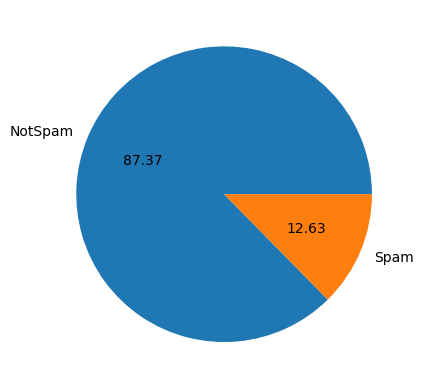

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df["Category"].value_counts(),labels=["NotSpam","Spam"],autopct="%0.2f")
plt.show()

Data is imbalanced

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Number of characters in each email
df['num_characters']=df['Message'].apply(len)
df.head()

<ipython-input-154-10f18ff7596f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['Message'].apply(len)


,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Number of words in each email
df['num_of_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

<ipython-input-155-a45190c0e58f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


,Category,Message,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['words']=df['Message'].apply(lambda x:nltk.word_tokenize(x))
df.head()

<ipython-input-156-96e5799a6136>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words']=df['Message'].apply(lambda x:nltk.word_tokenize(x))


,Category,Message,num_characters,num_of_words,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,49,13,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [ ]:
df['num_of_sentence']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

<ipython-input-157-06328e3942be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_sentence']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Category,Message,num_characters,num_of_words,words,num_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go, until, jurong, point, ,, crazy, .., Avail...",2
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2
3,0,U dun say so early hor... U c already then say...,49,13,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1


In [ ]:
df[['num_characters','num_of_words','num_of_sentence']].describe()

,num_characters,num_of_words,num_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# Spam mails
df[df['Category']==1][['num_characters','num_of_words','num_of_sentence']].describe()

,num_characters,num_of_words,num_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# NotSpam mails
df[df['Category']==0][['num_characters','num_of_words','num_of_sentence']].describe()

,num_characters,num_of_words,num_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


From this, it can be stated that usually, spam mails are shorter in length as compared to non-spam mails.

<Axes: xlabel='num_characters', ylabel='Count'>

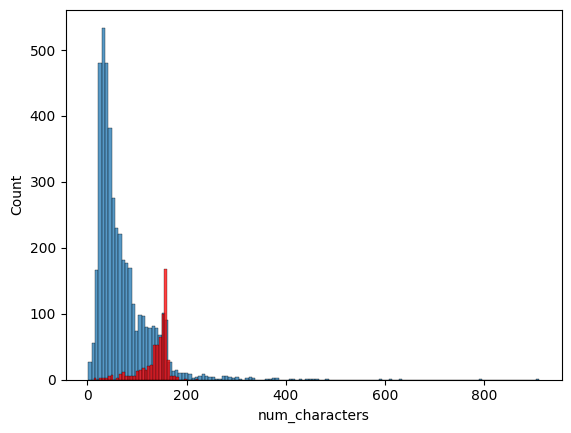

In [ ]:
import seaborn as sns
sns.histplot(df[df['Category']==0]['num_characters'])
sns.histplot(df[df['Category']==1]['num_characters'],color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

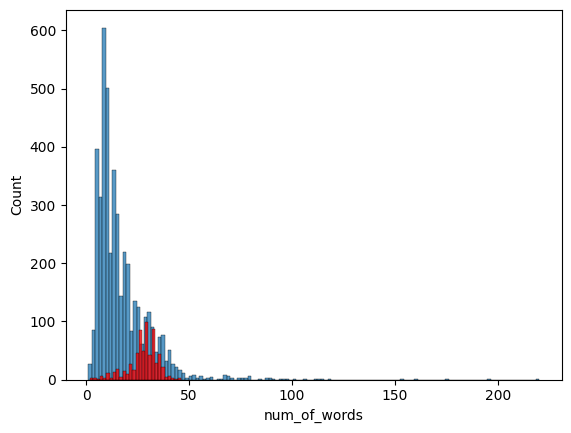

In [ ]:
# Spam mails use less words. Max. around 100 words
import seaborn as sns
sns.histplot(df[df['Category']==0]['num_of_words'])
sns.histplot(df[df['Category']==1]['num_of_words'],color='red')

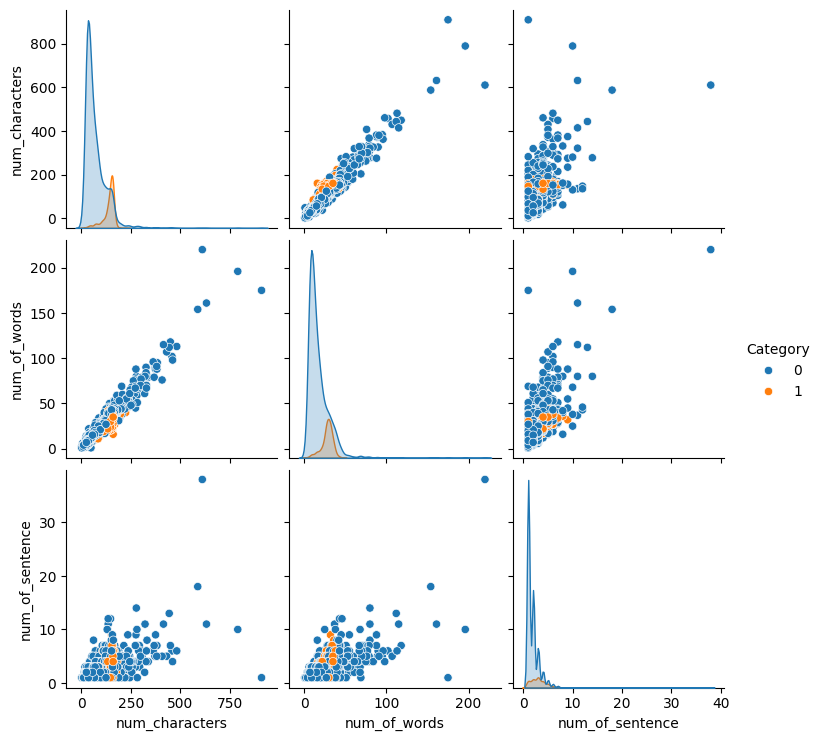

In [ ]:
sns.pairplot(df,hue='Category')

Outliers exist in our dataset.

<Axes: >

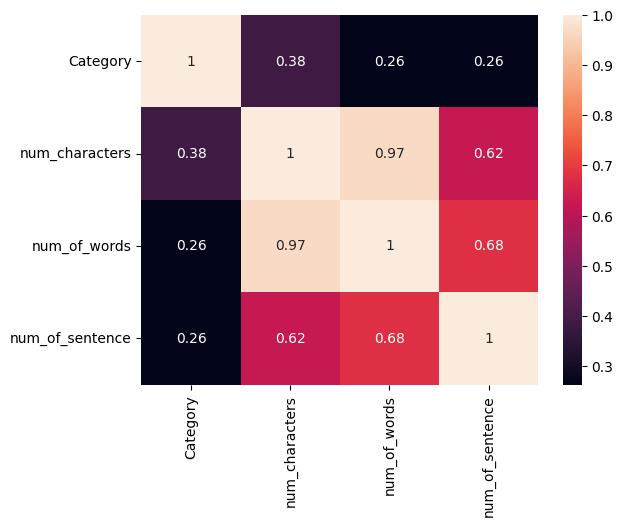

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True)

# DATA PREPROCESSING

1. Lowercase
2. Tokenization
3. Removing special charcaters
4. Removing stopwords and punctuations
5. Stemming


In [ ]:
import re

def clean_html(text):
    return re.sub(r'<.*?>', '', text).strip()


In [ ]:
df['Message']=df['Message'].apply(clean_html)

<ipython-input-102-266708b4c56c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message']=df['Message'].apply(clean_html)


In [ ]:
# Converting everything to lower
df['Message']=df['Message'].apply(lambda x:x.lower())

<ipython-input-103-3363fce03177>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message']=df['Message'].apply(lambda x:x.lower())


In [ ]:
# Removing special characters
import re
def remove_specialchar(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x


In [ ]:
df['Message']=df['Message'].apply(remove_specialchar)


<ipython-input-105-062c31cd4431>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message']=df['Message'].apply(remove_specialchar)


In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return [word for word in text.split() if word not in stop_words]

# Apply the function
df['Message'] = df['Message'].apply(remove_stopwords)

<ipython-input-106-b09cfaa5f434>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message'] = df['Message'].apply(remove_stopwords)


In [ ]:
df.head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_of_words,words,num_of_sentence
0,0,"[go, jurong, point, crazy, available, bugis, n...",NaN,NaN,NaN,111,24,"[Go, until, jurong, point, ,, crazy, .., Avail...",2
1,0,"[ok, lar, joking, wif, u, oni]",NaN,NaN,NaN,29,8,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",NaN,NaN,NaN,155,37,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2
3,0,"[u, dun, say, early, hor, u, c, already, say]",NaN,NaN,NaN,49,13,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1
4,0,"[nah, think, goes, usf, lives, around, though]",NaN,NaN,NaN,61,15,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1


In [ ]:
# To see punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Basic stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('playing')

'play'

In [ ]:
# Complete function for text transformation
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:] # perform cloning
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text('hi How ARE lucky estimation 6737&*(&()) YOU wanting ')

'hi lucki estim 6737 want'

In [ ]:
df['transform_text']=df['Message'].apply(transform_text)
df.head()

<ipython-input-167-77d34d058fae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']=df['Message'].apply(transform_text)


,Category,Message,num_characters,num_of_words,words,num_of_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go, until, jurong, point, ,, crazy, .., Avail...",2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok, lar, ..., Joking, wif, u, oni, ...]",2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,"[U, dun, say, so, early, hor, ..., U, c, alrea...",1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",1,nah think goe usf live around though


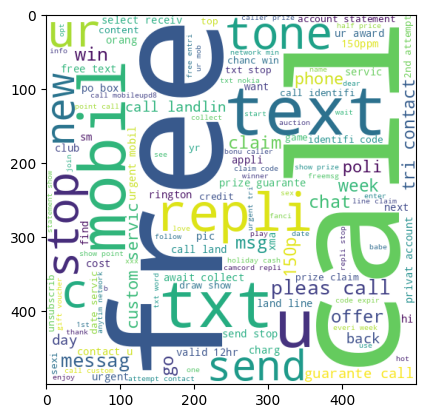

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc=wc.generate(df[df['Category']==1]['transform_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

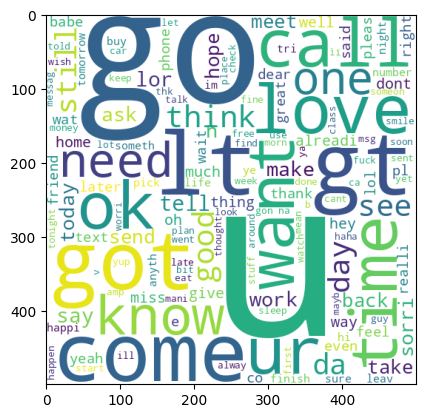

In [ ]:
notspam_wc=wc.generate(df[df['Category']==0]['transform_text'].str.cat(sep=" "))
plt.imshow(notspam_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['Category']==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
most_common = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["Word", "Frequency"])
most_common.head(5)

,Word,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


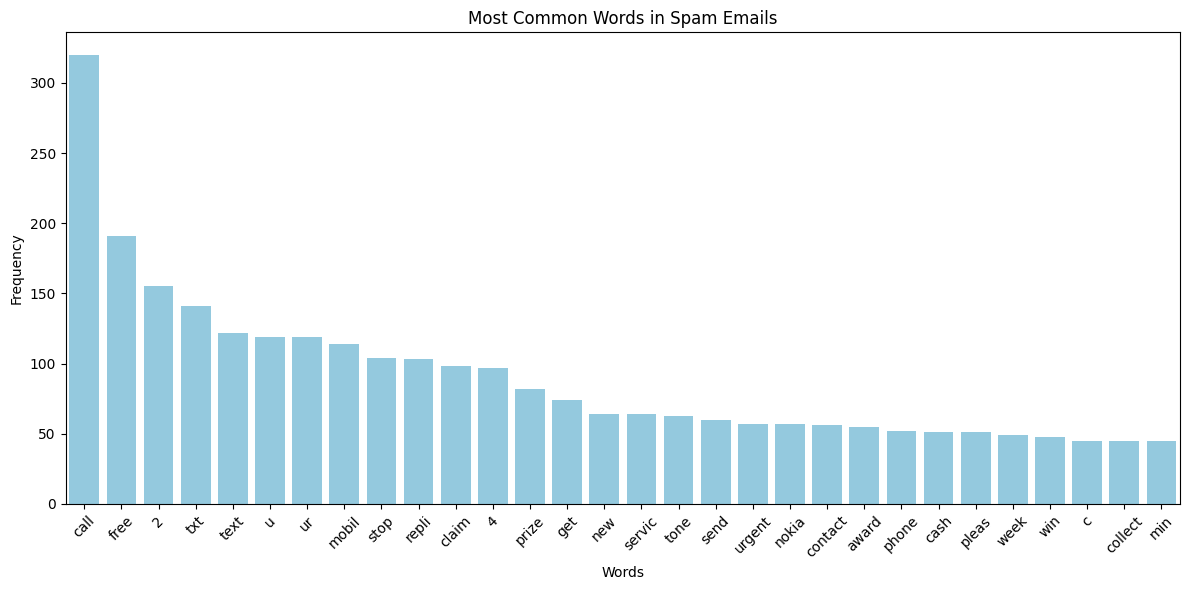

In [ ]:
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Frequency", data=most_common,color='skyblue')
plt.xticks(rotation=45)
plt.title("Most Common Words in Spam Emails")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
notspam_corpus=[]
for msg in df[df['Category']==0]['transform_text'].tolist():
  for word in msg.split():
    notspam_corpus.append(word)

len(notspam_corpus)

35404

In [ ]:
most_common_notspam = pd.DataFrame(Counter(notspam_corpus).most_common(30), columns=["Word", "Frequency"])
most_common_notspam.head(5)

,Word,Frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


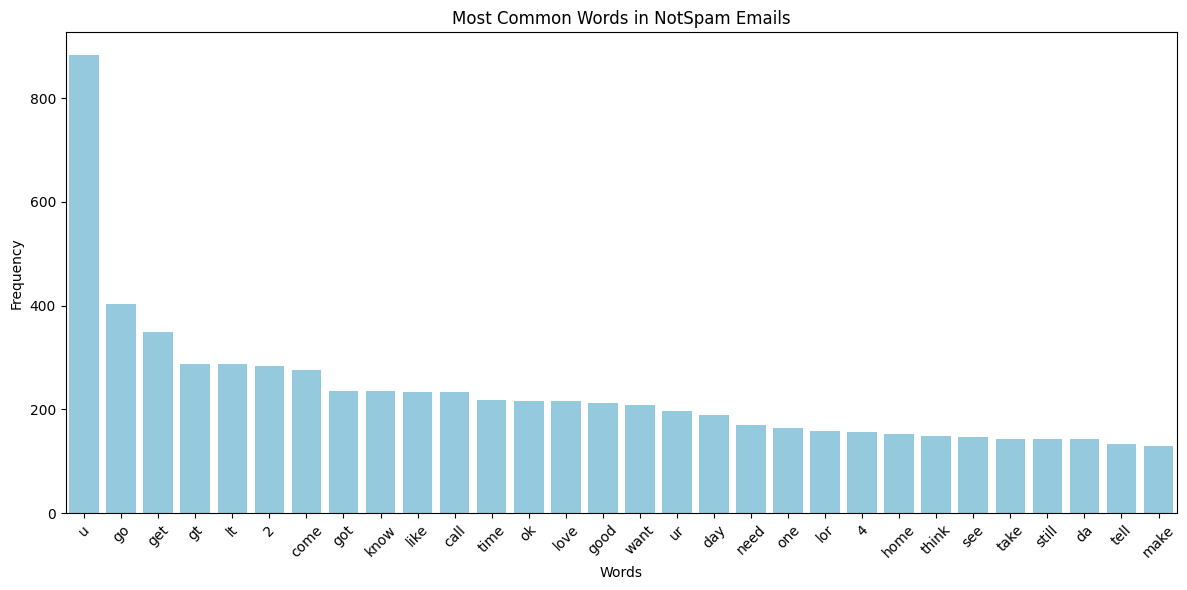

In [ ]:
import seaborn as sns

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Frequency", data=most_common_notspam,color='skyblue')
plt.xticks(rotation=45)
plt.title("Most Common Words in NotSpam Emails")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# This imports the TfidfVectorizer class, which converts raw text into a numerical
# format based on Term Frequency-Inverse Document Frequency (TF-IDF).

df['Message'] = df['Message'].astype(str)
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['Message']).toarray()  # Convert text to numerical features
y = df['Category']  # Target variable

<ipython-input-177-b24e37ce469b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Message'] = df['Message'].astype(str)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Guassian Naive Bayes")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print("\n")

mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print("Multinomial Naive Bayes")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred2) * 100))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred2)))
print(confusion_matrix(y_test,y_pred2))
print("\n")

bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print("Bernoulli Naive Bayes")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred3) * 100))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred3)))
print(confusion_matrix(y_test,y_pred3))


Guassian Naive Bayes
Accuracy: 88.39%
Precision: 0.55
[[800  93]
 [ 27 114]]


Multinomial Naive Bayes
Accuracy: 97.00%
Precision: 0.99
[[892   1]
 [ 30 111]]


Bernoulli Naive Bayes
Accuracy: 97.87%
Precision: 0.98
[[891   2]
 [ 20 121]]


We chose TFidf --> Multinomial Naive Bayes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifiers(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  precision=precision_score(y_test,y_pred)
  accuracy=accuracy_score(y_test,y_pred)

  return accuracy, precision

In [ ]:
train_classifiers(svc,x_train,y_train,x_test,y_test)

(0.9748549323017408, 0.967479674796748)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifiers(clf,x_train,y_train,x_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.967479674796748
For  KN
Accuracy -  0.9100580270793037
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  0.9910714285714286
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8585858585858586
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9196428571428571
For  RF
Accuracy -  0.971953578336557
Precision -  0.9745762711864406
For  AdaBoost
Accuracy -  0.9468085106382979
Precision -  0.9574468085106383
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.9401709401709402
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9916666666666667
For  GBDT
Accuracy -  0.9545454545454546
Precision -  0.9607843137254902
For  xgb
Accuracy -  0.971953578336557
Precision -  0.9745762711864406


In [ ]:
performance_models=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_models

,Algorithm,Accuracy,Precision
1,KN,0.910058,1.000000
8,ETC,0.977756,0.991667
2,NB,0.970019,0.991071
10,xgb,0.971954,0.974576
5,RF,0.971954,0.974576
0,SVC,0.974855,0.967480
9,GBDT,0.954545,0.960784
6,AdaBoost,0.946809,0.957447
7,BgC,0.963250,0.940171
4,LR,0.954545,0.919643


# Optimizing model
1. Change max_features in tfidf .We changed from 300 to 3000 and it result in high precision.

2. We can use min max scaling because standard scaling includes negative values which is not acceptable by naive bayes.

3. We can try appending num_characters column in X using np.hstack((X,df['num_characters'].values.reshape(-1,1))).

After looking at all this improvements we find using 1. option optimize our model at greater amount i.e. improving accuarcy and precision score.

In [ ]:
# VOTING CLASSIFIER
from sklearn.ensemble import VotingClassifier
svc=SVC(kernel='sigmoid',gamma=0.1,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
rf=RandomForestClassifier(n_estimators=50, random_state=2)



In [ ]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('rf',rf),('et',etc)],voting='soft')

In [ ]:
voting.fit(x_train,y_train)
y_pred=voting.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Accuracy:  0.97678916827853
Precision:  0.975609756097561


In [ ]:
# Applying Stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))

Accuracy:  0.9816247582205029
Precision:  0.9485294117647058


Stacking classifier do not improve our model . So, we will not use it.

In [ ]:
review = input("Enter email: ")
cleaned = transform_text(review)
vector = vectorizer.transform([cleaned]).toarray()

# Prediction
prediction = voting.predict(vector)

print(f"Spam Detection: {'Spam' if prediction[0]==1 else 'NotSpam'}")